In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#https://grouplens.org/datasets/movielens    <<--source 

#import the first file -- one of 4
movies = pd.read_csv ('movies.csv')
movies.head()
movies.shape


In [3]:
#import the second file -- two of 4  (will not be using the data for the plot)
links = pd.read_csv ('links.csv')
links.head()
links.shape

In [4]:
#import the third file -- three of 4
ratings = pd.read_csv ('ratings.csv')
ratings.head()
ratings.shape

In [5]:
#check the data -- this code calculates the count of ratings for each movie and rating value, 
#filters for movies with more than one rating, and stores the result in the 'filtered' DataFrame.
rating_counts = ratings.groupby(['rating', 'movieId']).size().reset_index(name='count')
filtered = rating_counts[rating_counts['count'] > 1]
filtered

,rating,movieId,count
5,0.5,17,2
10,0.5,47,2
11,0.5,48,2
19,0.5,158,3
20,0.5,168,3
...,...,...,...
30394,5.0,174055,2
30401,5.0,176371,3
30404,5.0,177593,4
30405,5.0,177765,4


In [6]:
#import the 4th file -- four of 4
tags = pd.read_csv ('tags.csv')
tags.head()
tags.shape

In [8]:
#combine file rating to file tags
combineA = pd.merge(ratings, tags, on=['userId', 'movieId'], how='left')

#combineA + file movies to create final datafram called combined
combined = pd.merge(combineA, movies, on=['movieId'], how='left')

combined

In [9]:
#validate the data and count the number of movies
combined.groupby('movieId').size().reset_index(name='count')


,movieId,count
0,1,215
1,2,112
2,3,53
3,4,7
4,5,50
...,...,...
9719,193581,1
9720,193583,1
9721,193585,1
9722,193587,1


In [10]:
#unique out the genres -- validate and strip out the data in the genre column
genre = combined['genres'].unique()
genre


array(['Adventure|Animation|Children|Comedy|Fantasy', 'Comedy|Romance',
       'Action|Crime|Thriller', 'Mystery|Thriller',
       'Crime|Mystery|Thriller', 'Action|Comedy|Horror|Thriller',
       'Adventure|Comedy|Crime|Romance', 'Action|Drama|War',
       'Action|Drama|Romance|War', 'Comedy|War', 'Action|Romance|Western',
       'Comedy', 'Adventure|Comedy', 'Comedy|Drama',
       'Action|Adventure|Sci-Fi', 'Comedy|Crime|Drama|Thriller',
       'Action|Crime|Drama|Thriller', 'Comedy|Drama|Romance|War',
       'Adventure|Children|Romance', 'Action|Comedy|Crime|Fantasy',
       'Action|Thriller', 'Thriller', 'Action|Adventure|Sci-Fi|Thriller',
       'Drama|War', 'Comedy|Romance|Thriller',
       'Action|Adventure|Comedy|Romance', 'Action|Drama|Western',
       'Adventure|Drama|Western', 'Crime|Horror|Thriller',
       'Animation|Children|Fantasy|Musical',
       'Action|Adventure|Mystery|Thriller',
       'Adventure|Animation|Children|Fantasy|Musical',
       'Adventure|Animation|Chil

In [24]:
#validate the data for the plot 
#check column names
print(combined.columns)

#check data types of columns
print(combined.dtypes)

Index(['userId', 'movieId', 'rating', 'timestamp_x', 'tag', 'timestamp_y',
       'title', 'genres'],
      dtype='object')
userId           int64
movieId          int64
rating         float64
timestamp_x      int64
tag             object
timestamp_y    float64
title           object
genres          object
dtype: object


In [11]:

genre_df = pd.DataFrame({'genres': genre}).sort_values(by='genres', ascending=True)

genre_df.to_csv('output.csv', index=False)
    

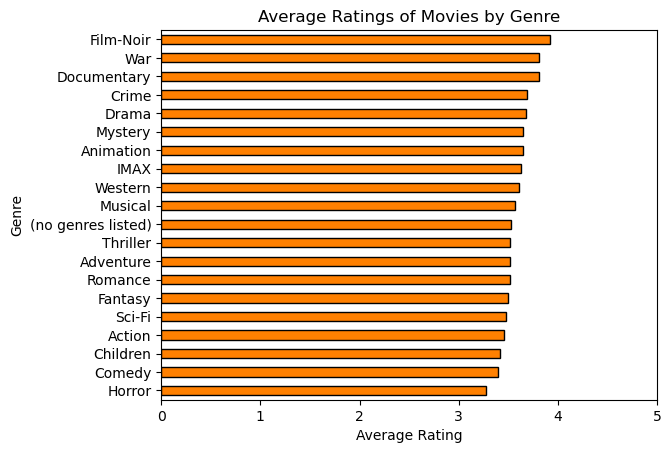

In [27]:
# #For each interest, lets see how people rated them
# genres = ['Action', 'Adventure', 'Animation', 'Children', 'Comedy', 'Crime', 'Documentary', 'Drama', 
#           'Fantasy', 'Film Noir', 'Horror', 'Musical', 'Mystery', 'Romance', 'Sci-Fi', 'Thriller', 'War', 'Western']

# # Calculate average ratings for each genre
# average_genre_ratings = combined.groupby('rating').mean().loc[:, genres].mean(axis=0)


#extract the list of unique genres from the 'genres' column
genres = combined['genres'].str.split('|', expand=True).stack().unique()

#calculate average ratings for each genre
average_genre_ratings = combined.groupby('genres')['rating'].mean()


#create a bar chart with genres on the Y-axis and ratings on the X-axis
average_genre_ratings.sort_values().plot(kind='barh', color='#FF8000', edgecolor='black') #using the builtin plot method
plt.xlim(0, 5)  #xet the X-axis limit to match the rating scale (0 to 5)
plt.xlabel('Average Rating')
plt.ylabel('Genre')
plt.title('Average Ratings of Movies by Genre')
plt.show()
